In [14]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print (sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
2.1.2
3.8.4
0.13.2
1.5.0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
# Load data
games = pandas.read_csv("games.csv")

In [17]:
# Print the names of the columns in games
print(games.columns)

print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


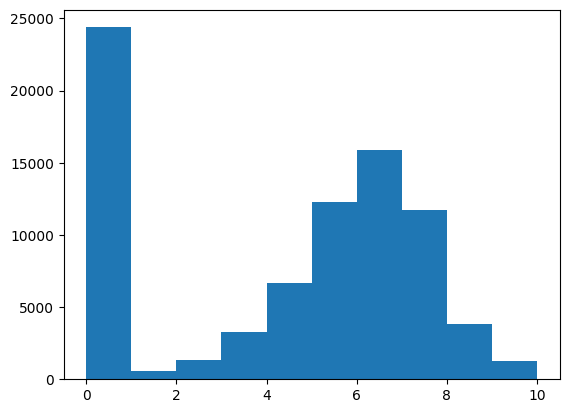

In [18]:
# Make a histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [19]:
# Print the first row of all the games with zero scores
print(games[games["average_rating"] == 0].iloc[0])

# Print the first row of all the games with scores greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

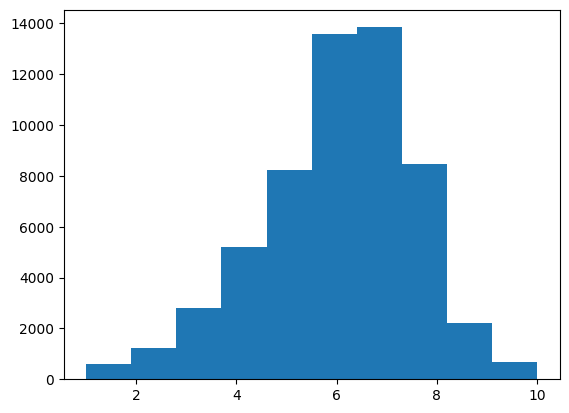

In [20]:
# Remove any rows without user reviews
games = games[games["users_rated"] > 0]

# Remove any rows with missing values
games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

In [23]:
print(games.dtypes)

id                        int64
type                     object
name                     object
yearpublished           float64
minplayers              float64
maxplayers              float64
playingtime             float64
minplaytime             float64
maxplaytime             float64
minage                  float64
users_rated               int64
average_rating          float64
bayes_average_rating    float64
total_owners              int64
total_traders             int64
total_wanters             int64
total_wishers             int64
total_comments            int64
total_weights             int64
average_weight          float64
dtype: object


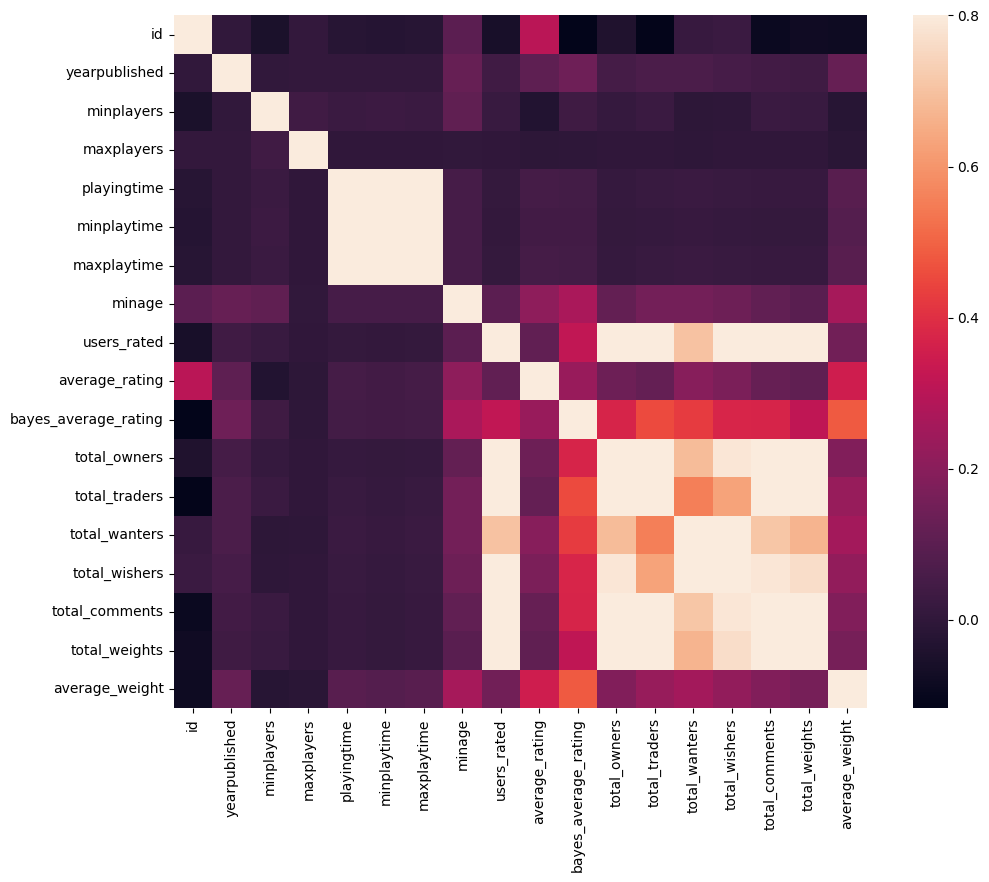

In [25]:
# Correlation matrix
corrmat = games.corr(numeric_only=True)
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax= 0.8,square=True)
plt.show()

In [34]:
# Get all columns from dataframe
columns=games.columns.tolist()

# Filter columns to remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

# store variable we will be predicting on
target = "average_rating"

In [35]:
# Generate training set
train = games.sample(frac=0.8,random_state=1)

# Select anything not in training set and put in test set
test = games.loc[~games.index.isin(train.index)]

# Print shape
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [36]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Model Class
LR = LinearRegression()

# Fit model to training data
LR.fit(train[columns],train[target])

LinearRegression()

In [37]:
# Generate predictions for the test set
predictions = LR.predict(test[columns])

# Compute error between test predictions and actual values
mean_squared_error(predictions,test[target])

2.0787793932661276

In [38]:
# Import random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(train[columns],train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [39]:
# Generate predictions
predictions = RFR.predict(test[columns])

# Compute Error
mean_squared_error(predictions,test[target])

1.4458625791207198

In [46]:
test[columns].iloc[1]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [47]:
# Make prediction with both models
rating_LR = LR.predict(test[columns].iloc[[1]])
rating_RFR = RFR.predict(test[columns].iloc[[1]])

# Print predictions
print(rating_LR)
print(rating_RFR)



[9.2078683]
[7.85532168]


In [48]:
test[target].iloc[1]

7.99115